In [21]:
import os, sys, shutil
from datetime import datetime, timedelta
from PIL import Image, ImageDraw, ImageFont
from operator import itemgetter
import numpy as np

In [22]:
input_dir = "/media/Gui2/thermix/full_day_fanny/14_tim/3"
videos = os.listdir(input_dir)

In [23]:
def imhist(im):
    m, n = im.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[im[i, j]]+=1
    return np.array(h)/(m*n)

def cumsum(h):
    # finds cumulative sum of a numpy array, list
    return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
    #calculate Histogram
    h = imhist(im)
    cdf = np.array(cumsum(h)) #cumulative distribution function
    sk = np.uint8(255 * cdf) #finding transfer function values
    s1, s2 = im.shape
    Y = np.zeros_like(im)
    # applying transfered values for each pixels
    for i in range(0, s1):
        for j in range(0, s2):
            Y[i, j] = sk[im[i, j]]
    H = imhist(Y)
    #return transformed image, original and new istogram, 
    # and transform function
    return Y , h, H, sk

In [43]:
dates_of_video = []
for video in videos:
    name_of_video = os.path.basename(video)

    # str_date_of_video = 2016-06-20T18%3A46%3A22
    str_date_of_video = "T".join(os.path.splitext(name_of_video)[0].split("_")[-2:])

    # date_of_video = datetime(2016-06-20 18:46:22)
    date_of_video = datetime.strptime(str_date_of_video,"%Y-%m-%dT%H%%3A%M%%3A%S")

    #convert to argentinian date
    date_of_video -= timedelta(hours=3)
    
    dates_of_video.append((date_of_video, video))
    
dates_of_video = sorted(dates_of_video, key=itemgetter(0))

In [ ]:
overridden_frames = []
for dat,vid in dates_of_video:
    if dat < datetime(2016,7,10,4,40,0):
        video_path = os.path.join(input_dir, vid)
        frames = os.listdir(video_path)
        for frame in frames:
            frame_path = os.path.join(video_path, frame)
            im = Image.open(frame_path)
            im2 = im.rotate(180)
            #im2.save(frame_path)
            overridden_frames.append(frame_path)

In [56]:
print overridden_frames[0]
print overridden_frames[-1]

/media/Gui2/thermix/full_day_fanny/14_tim/3/Users_golden5s_unkown_2016-07-08_20%3A19%3A49.000000_1/21_2.png
/media/Gui2/thermix/full_day_fanny/14_tim/3/Users_golden5s_unkown_2016-07-09_10%3A19%3A03.000000_1/6_1.png


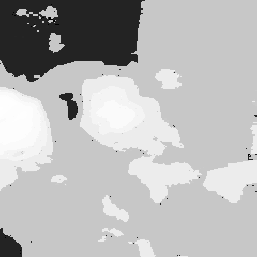

In [66]:
image = Image.open("/media/Gui2/thermix/full_day_fanny/14_tim/3/Users_golden5s_unkown_2016-07-08_20%3A19%3A49.000000_1/21_2.png")
if image.mode != "RGB":
    image=image.convert("RGB")

image = np.asarray(image) 

r = image[:,:,0]
eq_1,_,_,_ = histeq(r)
image = Image.fromarray(eq_1, 'L')

if image.mode != "RGB":
    image=image.convert("RGB")

image